- This is a Classifcation problem


- Description: A business manager of a consumer credit card portfolio is facing the problem of customer attrition. They want to analyze the data to find out the reason behind this and leverage the same to predict customers who are likely to drop off.


- Target: Attrition_Flag


- Features: 19


- Total Rows: 10,127


- Challenges: Low percentage of members that have recently left the service is low, might be harder to model


In [1]:
!pip install dython

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np    
import os
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.model_selection import train_test_split

!pip install imblearn
from imblearn.over_sampling import SMOTE
from dython.nominal import associations
from sklearn import set_config

# Data Load

In [3]:
df = pd.read_csv('Data/BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

Dataset contains:
    
- (10) integer types
    
- (6) object types
    
- (5) float types

# Data Clean

In [5]:
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)

Dropping last two columns as they are not relevant to our analysis

In [6]:
# Confirmed columns are now dropped

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

Check for duplicate values

In [7]:
df.duplicated().sum()

0

Check for any missing values

In [8]:
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [9]:
df['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [10]:
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [11]:
# Confirm number of customers that have left
 
df['Attrition_Flag'].value_counts(normalize=True)*100

Existing Customer    83.934038
Attrited Customer    16.065962
Name: Attrition_Flag, dtype: float64

Currently 16 percent of customers have left after recently opening an account. As we can see, there is an imbalance in our dataset. Meaning that in order to model our data and not influence our predictions to likely predict the majority class, we must intervene. 

I will use SMOTE to upsample the churn samples to match them with the regular customer sample size to give the later selected models a better chance of catching on small details which will almost definitely be missed due to size differences.

In [12]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [13]:
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

Dataset seems to contain no outliers or outstanding values

# Exploratory Data Analysis

In [14]:
df['Attrition_Flag'].value_counts(normalize=True)*100

Existing Customer    83.934038
Attrited Customer    16.065962
Name: Attrition_Flag, dtype: float64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [16]:
# Seperate the data into numeric and categorical

numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

#Reference: http://theprofessionalspoint.blogspot.com/2019/03/how-to-separate-numeric-and-categorical.html

### Distribution of Numeric Features

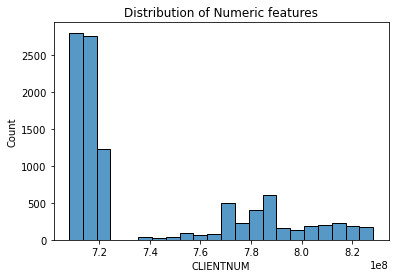

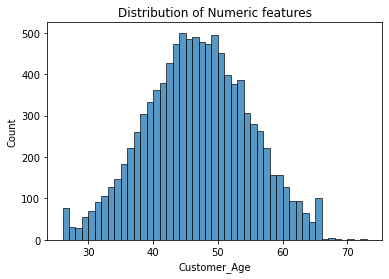

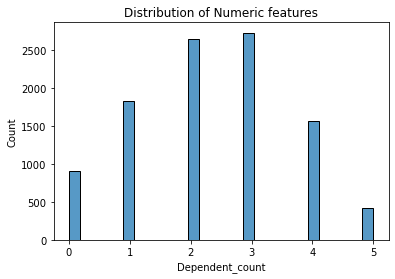

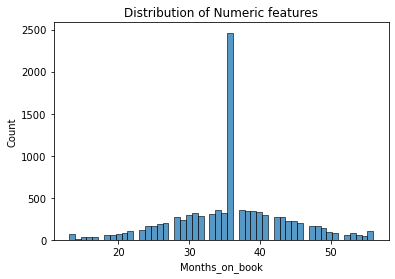

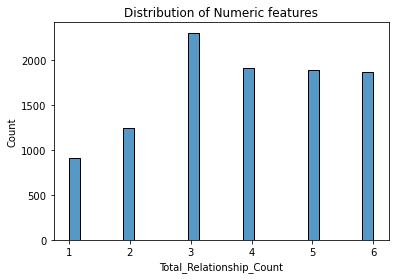

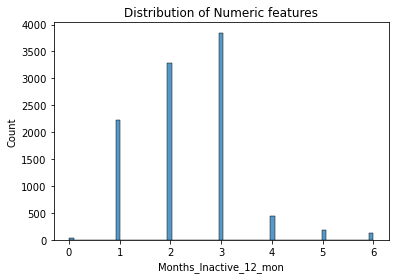

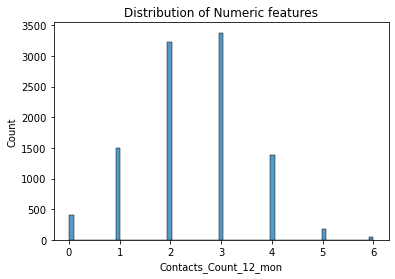

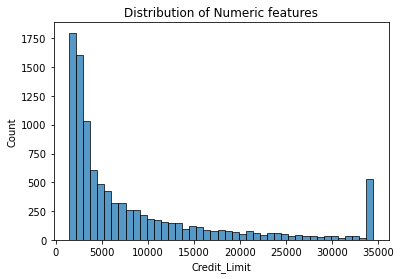

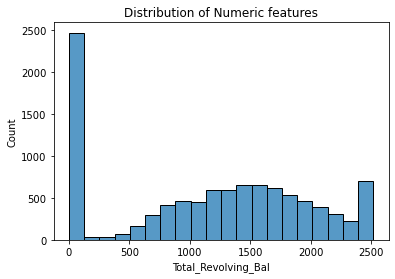

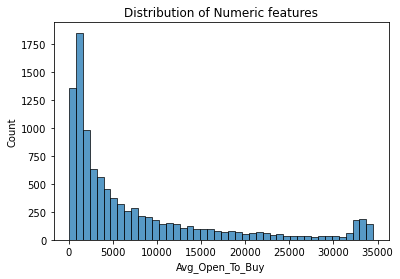

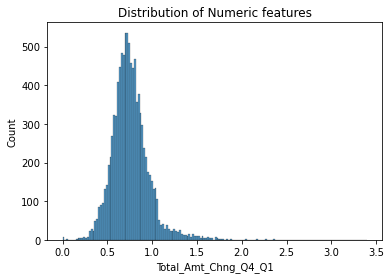

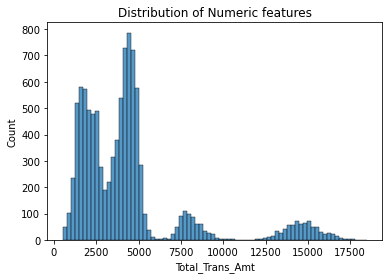

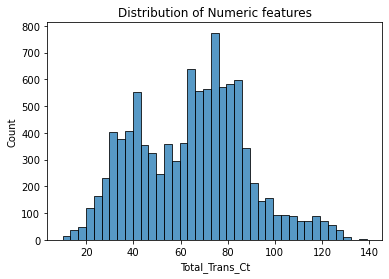

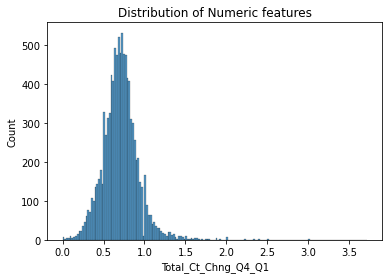

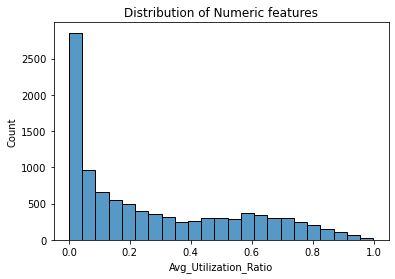

In [17]:
for i in numeric_data.columns:
    sns.histplot(numeric_data[i]).set_title('Distribution of Numeric features')
    plt.show()

In [18]:
# Numerical 
# Rows, Columns

numeric_data.shape

(10127, 15)

In [19]:
# Categorical
# Rows, Columns

categorical_data.shape

(10127, 6)

### Correlation Heatmap between Numeric columns

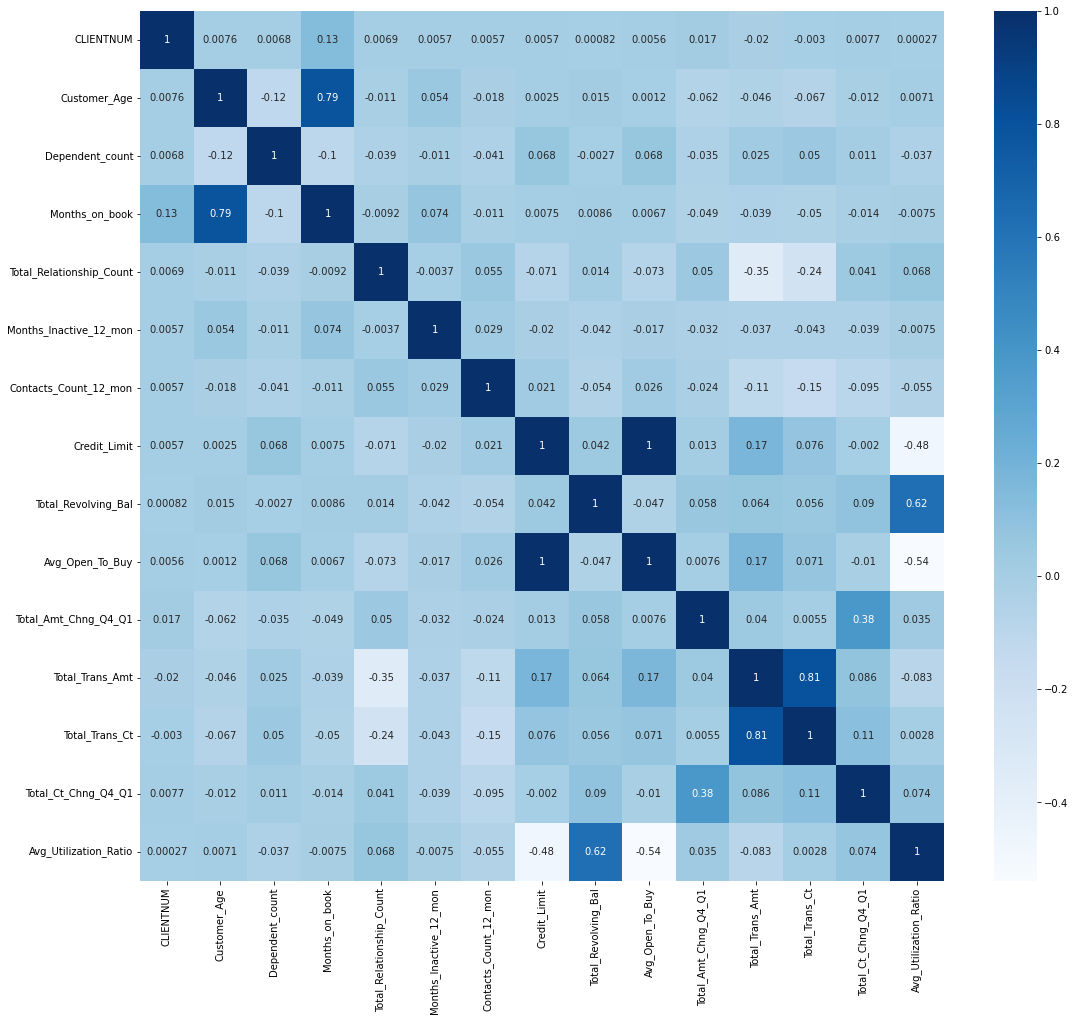

In [20]:
# Correalation Heatmap between data in numeric columns
corr = df.corr()

plt.figure(figsize=(18,16))
sns.heatmap(corr, cmap='Blues', annot=True);

Correlation between our numeric features look to have a great amount of strong to very strong trends. Although a few, they satisfy our needs, for example:

Perfect Correlation
- 100% - Credit_Limit & Avg_Open_To_Buy

Very Strong Correlation
- 81% - Total_Trans_Amt & Total_Trans_Ct

Strong Correlation
- 79% - Months_on_book & Customer_Age
- 62% - Avg_Utilization_Ratio & Total_Revolving_Bal

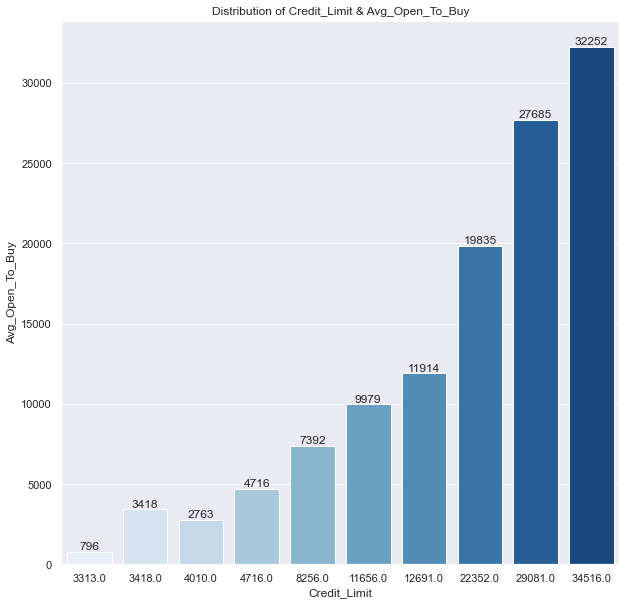

In [45]:
# Months_on_book & Customer_Age Trend
# Avg_Open_To_Buy equals credit limit when opening account

ax = sns.barplot(data=df[:10], x="Credit_Limit", y="Avg_Open_To_Buy" , palette='Blues', ci=None);
ax.set_title('Distribution of Credit_Limit & Avg_Open_To_Buy')
sns.set(rc = {'figure.figsize':(10,10)})
ax.bar_label(ax.containers[0]);

# Reference: https://www.delftstack.com/howto/seaborn/size-of-seaborn-plot/

100% - Credit_Limit & Avg_Open_To_Buy

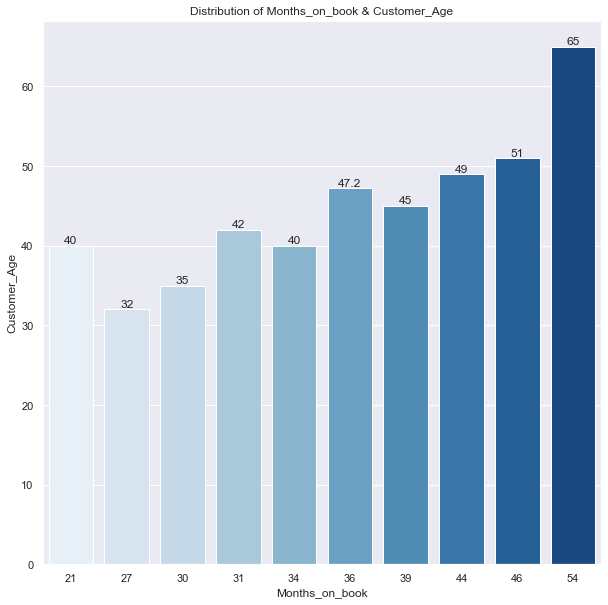

In [46]:
# Months_on_book & Customer_Age Trend
# Months_on_book equals elapsed time since account opening

ax = sns.barplot(data=df[:14], x="Months_on_book", y="Customer_Age" , palette='Blues', ci=None);
ax.set_title('Distribution of Months_on_book & Customer_Age')
sns.set(rc = {'figure.figsize':(10,10)})
ax.bar_label(ax.containers[0]);

# Reference: https://www.delftstack.com/howto/seaborn/size-of-seaborn-plot/

79% correlation - Months_on_book & Customer_Age

### Correlation Heatmap between Numeric and Categorical columns

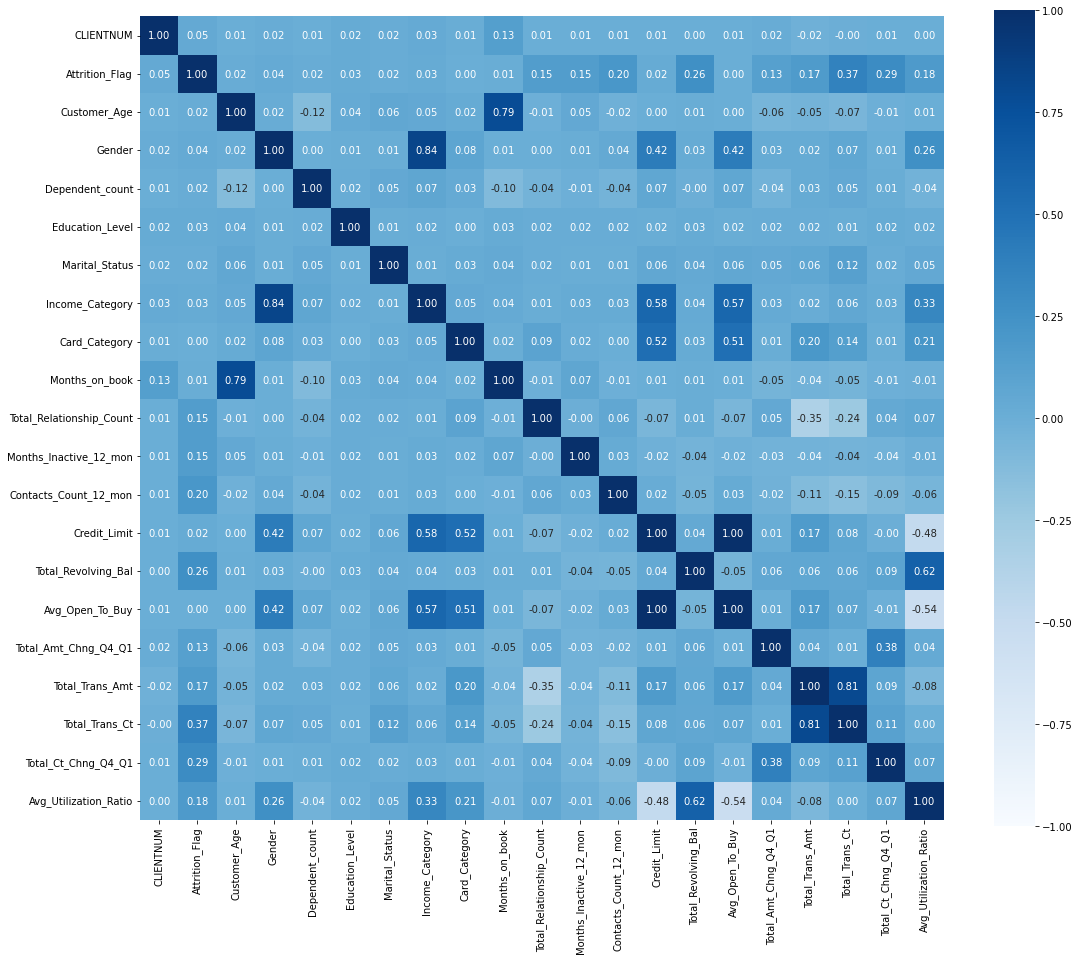

In [23]:
# Correlation Heatmap between Numeric and Categorical columns

associations(df, figsize=(18, 15), cmap='Blues');

Now including categorical & numeric features to pinpoint any correlation between the two. Our numeric features remain with the strongest correlation but we do notice a notable few to mention. For example:

Perfect Correlation
- 100% - Credit_Limit & Avg_Open_To_Buy

Very Strong Correlation
- 84% - Income_Category & Gender 
- 81% - Total_Trans_Amt & Total_Trans_Ct

Strong Correlation
- 79% - Months_on_book & Customer_Age
- 62% - Avg_Utilization_Ratio & Total_Revolving_Bal


Income_Category and Gender added to list of Very Strong Correlation between Numeric and Categorical features

Reference: https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module9-Correlation-Regression/PH717-Module9-Correlation-Regression4.html

In [24]:
df['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

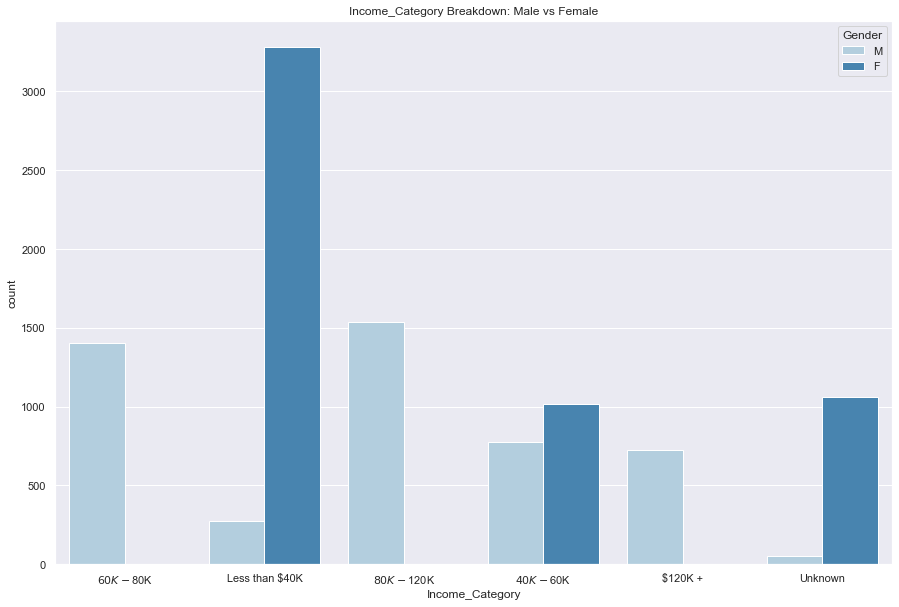

In [37]:
ax = sns.countplot( x=df['Income_Category'] , hue='Gender', data= df, palette='Blues')
ax.set_title('Income_Category Breakdown: Male vs Female')
sns.set(rc = {'figure.figsize':(12,10)})
plt.show(ax , df)

# Data Preprocessing

In [25]:
#df['Gender']= df['Gender'].replace({'M': 0, 'F': 1}, regex=True)

# regex=true made replace possible for binary
# reference - https://stackoverflow.com/questions/67409458/why-is-pandas-replace-method-not-working

In [27]:
# Attrition_Flag is the target
#y = df['Attrition_Flag']

# drop Attrition_Flag since it is the target. 
#X = df.drop('Attrition_Flag', axis=1)

#X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42)

# SMOTE

As there is an imbalance within our dataset, with 16% of the data samples representing attrited customers. I will make use of SMOTE to upsample the churn samples to match them with the regular customer sample size to give the later selected models a better chance of catching on small details which will almost definitely be missed out with such a size difference.